In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv("Mall_Customers.csv")
display(df.head())


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


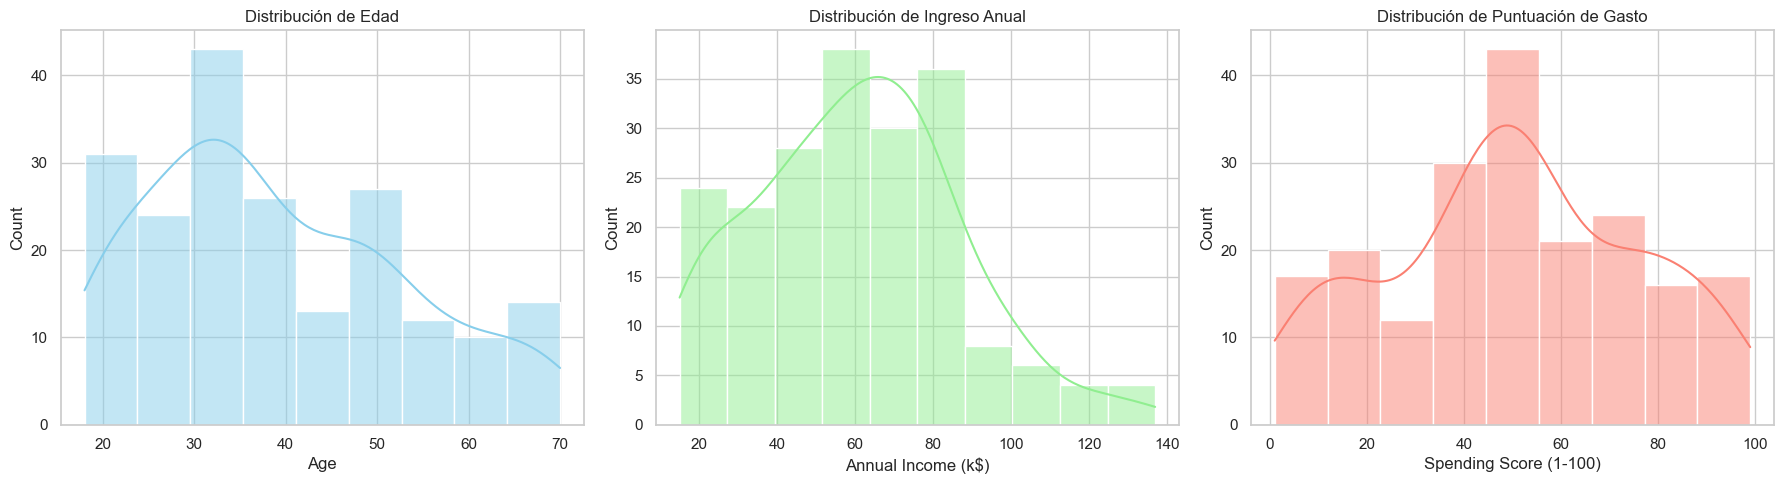

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Distribución de Edad")
sns.histplot(df["Annual Income (k$)"], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title("Distribución de Ingreso Anual")
sns.histplot(df["Spending Score (1-100)"], kde=True, ax=axs[2], color='salmon')
axs[2].set_title("Distribución de Puntuación de Gasto")
plt.tight_layout()
plt.show()

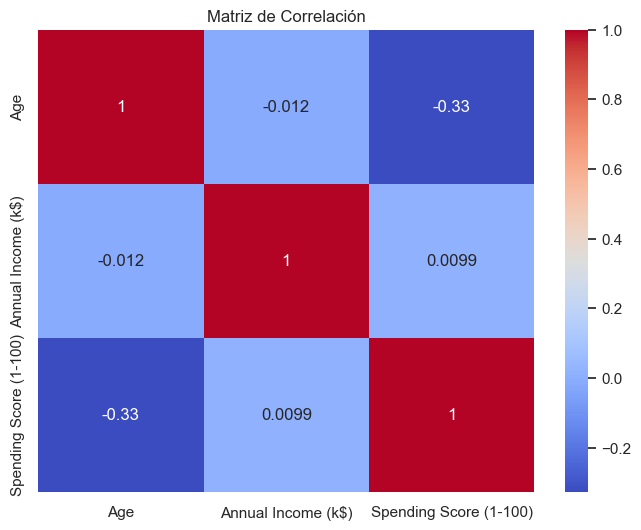

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='CustomerID').corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [6]:
df_clean = df.drop(columns=["CustomerID"])
df_clean["Gender"] = LabelEncoder().fit_transform(df_clean["Gender"])

print("Valores faltantes:\n", df_clean.isnull().sum())

Valores faltantes:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

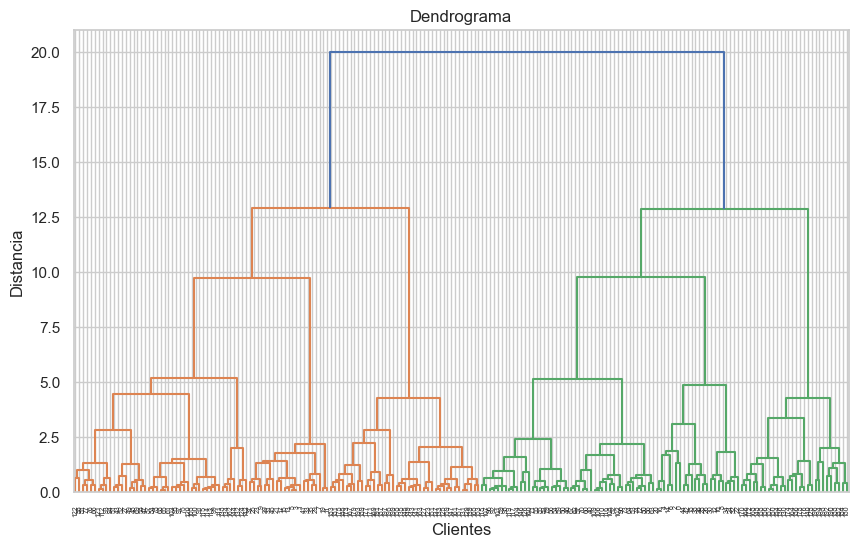

In [8]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

In [9]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)
df_clean["Cluster"] = labels

In [10]:
sil_score = silhouette_score(X_scaled, labels)
calinski_score = calinski_harabasz_score(X_scaled, labels)
print(f"Coeficiente de Silhouette: {sil_score:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski_score:.2f}")

Coeficiente de Silhouette: 0.390
Índice de Calinski-Harabasz: 107.83


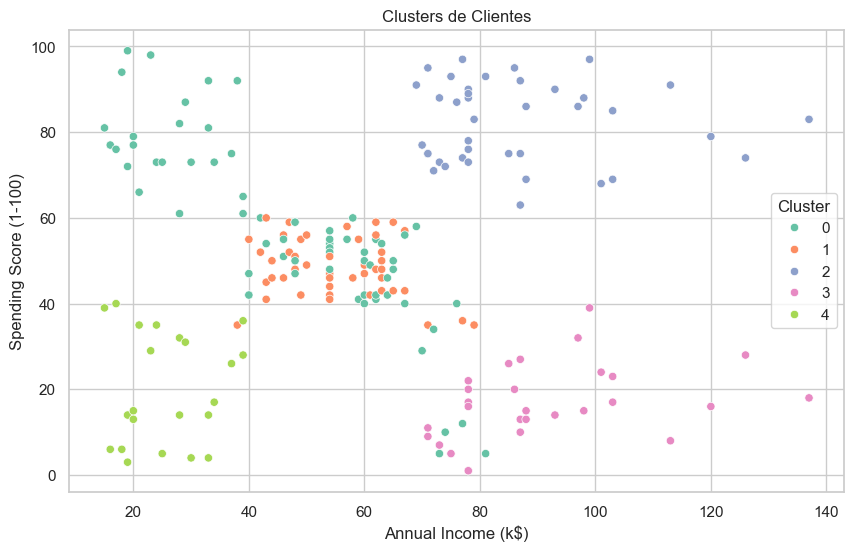

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set2")
plt.title("Clusters de Clientes")
plt.show()

In [12]:
cluster_summary = df_clean.groupby("Cluster")[features].mean()
cluster_sizes = df_clean["Cluster"].value_counts().sort_index()
display(cluster_summary)
print("Tamaño de cada cluster:\n", cluster_sizes)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,26.560606,47.363636,56.787879
1,56.400000,55.288889,48.355556
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571
4,44.318182,25.772727,20.272727


Tamaño de cada cluster:
 Cluster
0    66
1    45
2    39
3    28
4    22
Name: count, dtype: int64


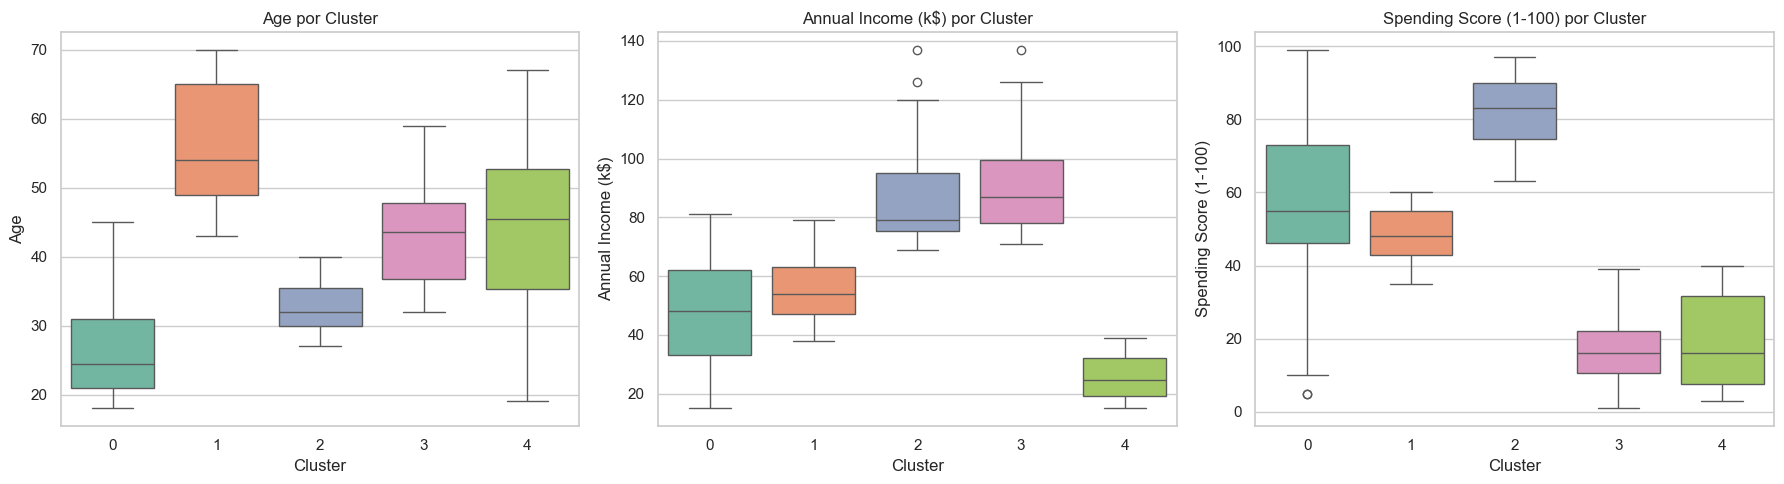

In [35]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 5))

for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df_clean, ax=axes[i],
                hue='Cluster', palette='Set2', legend=False)
    axes[i].set_title(f"{feature} por Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()